### Dependencies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### Reading in data

Using the Pandas dataframe, we can gain a lot of valuable information from simply profiling the dataset.

In [2]:
df = pd.read_csv('Month_Value_1.csv')

In [28]:
df.head(5)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


Using the .head(n) method in Pandas returns the first 5 rows of the dataset, giving us a glimpse of the data we may be dealing with. It appears we have timestamps (obviously for time series), and 4 continuous variables. In time series, performing a multi-variate regression that isn't generated from lags can prove challenging, so we will select the column we see fit.

In [31]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


The .describe() method from Pandas can be valuable for both continuous and categorical columns. It utilizes a series of aggregate functions to tell us some rudimentary statistical properties of each variable

In [3]:
df.columns

Index(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'],
      dtype='object')

.columns is simple, but generates an array of strings representing the name in each column

In [9]:
model_df = df.copy()
model_df = model_df[model_df['Revenue'].isna() == False]

Before we begin modeling, we have to do some very simple data cleaning. Data cleaning is fondly referred to as 95% of the data science process, but we will only remove the null values from this dataset (those represent the future quantities we want to predict on).

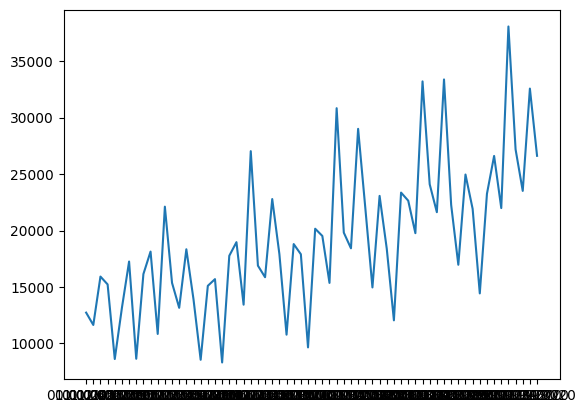

In [27]:
plt.plot(model_df['Period'], model_df['Sales_quantity'])

Taking a look at timestamp vs. sales quantity, it appears this will be suitable for modeling. Let's take a further look at some statistical properties

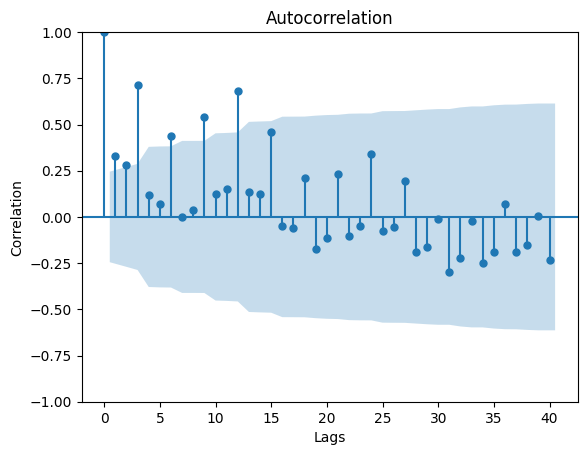

In [34]:
plot_acf(model_df['Sales_quantity'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

Above is one of the most valuable plots that a data scientist can use on a time series. An ACF (autocorrelation function) regresses a target variable (in this case sales) against itself, except the response variable is the target with a certain amount of lags. We perform 40 regressions, 1-40 representing the amount of lags on the x-axis. We see a substantial correlation of .75 at lag=4, meaning that our dataset exhibits some seasonality over a 4 month cycle (quarterly). We will keep this in mind when modeling

In [36]:
adf = adfuller(model_df['Sales_quantity'])
print(f"t-stat: {adf[0]}")
print(f"p-value: {adf[1]}")

t-stat: 1.1570562060945409
p-value: 0.9956753282590142


Apart from seasonality, a major characteristic of time series is whether or not they exhibit a trend characteristic. The Augmented Dickey Fuller Test (adfuller) provides a statistical analysis of the time series. With a p-value < .05, we reject NONSTATIONERITY (or accept stationerity) and say that the time series does not have a trend. In this case the time series has a p-value of .99, indicating that our time series has a trend characteristic. This is consistent with the graph we viewed at the beginning.